In [1]:
# %ls

In [2]:
test_annot_bbbc = '../BBBC041v1/malaria/malaria/test.json'
train_annot_bbbc = '../BBBC041v1/malaria/malaria/training.json'

In [3]:
import pandas as pd
import json

import os
import xml.etree.ElementTree as ET
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
with open(test_annot_bbbc, 'r') as file:
    json_data_test = json.load(file)

# Normalize the JSON data
df_test = pd.json_normalize(json_data_test, 'objects')

# Extract unique categories
unique_categories = df_test['category'].unique()

test_category_counts = df_test['category'].value_counts()
# Print unique categories
print(unique_categories, test_category_counts)

['red blood cell' 'trophozoite' 'ring' 'schizont' 'difficult' 'gametocyte'] red blood cell    5614
ring               169
trophozoite        111
gametocyte          12
schizont            11
difficult            5
Name: category, dtype: int64


In [5]:
with open(train_annot_bbbc, 'r') as file:
    json_data_train = json.load(file)

# Normalize the JSON data
df_train = pd.json_normalize(json_data_train, 'objects')

# Extract unique categories
unique_categories = df_train['category'].unique()


train_category_counts = df_train['category'].value_counts()
# Print unique categories
print(unique_categories,train_category_counts )

['red blood cell' 'trophozoite' 'schizont' 'difficult' 'ring' 'leukocyte'
 'gametocyte'] red blood cell    77420
trophozoite        1473
difficult           441
ring                353
schizont            179
gametocyte          144
leukocyte           103
Name: category, dtype: int64


In [6]:
total_category_counts = test_category_counts.add(train_category_counts, fill_value=0)

In [7]:
total_category_counts

difficult           446.0
gametocyte          156.0
leukocyte           103.0
red blood cell    83034.0
ring                522.0
schizont            190.0
trophozoite        1584.0
Name: category, dtype: float64

In [8]:
total_parsite_count = total_category_counts['gametocyte'] + total_category_counts['ring'] + total_category_counts['schizont'] + total_category_counts['trophozoite'] 

In [9]:
print("Total parasite count : ", total_parsite_count)

Total parasite count :  2452.0


In [10]:
data_UG = '../Uganda - Dataset B/plasmodium-phonecamera/plasmodium-phonecamera'

In [11]:
def get_category_counts_from_xml(directory):
    category_counts = Counter()

    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.xml'):
            file_path = os.path.join(directory, filename)
            tree = ET.parse(file_path)
            root = tree.getroot()

            # Extract category labels from the XML file
            for obj in root.findall('object'):
                label = obj.find('label').text
                category_counts[label] += 1

    return category_counts

# Get category counts from the XML annotation files
category_counts_UG = get_category_counts_from_xml(data_UG)

# Print results
print("UG Dataset Category Counts:")
print(category_counts_UG)

UG Dataset Category Counts:
Counter({'plasmodium': 7628})


In [12]:
category_counts_UG['plasmodium']

7628

In [13]:
IML_data = '../IML-Malaria/archive/annotations.json'

In [14]:
def process_json(json_data):
    category_counter = Counter()
    image_set = set()
    
    for entry in json_data:
        image_name = entry['image_name']
        image_set.add(image_name)
        for obj in entry['objects']:
            category = obj['type']
            category_counter[category] += 1
    
    return category_counter, len(image_set)

# Load test JSON data
with open(IML_data, 'r') as file:
    json_iml_data = json.load(file)
    
    
    
iml_category_counts, iml_image_count = process_json(json_iml_data)

# Print results for test data
print("Test Data - Image Count:", iml_image_count)
print("Test Data - Category Counts:")
print(iml_category_counts)

Test Data - Image Count: 345
Test Data - Category Counts:
Counter({'red blood cell': 37899, 'gametocyte': 261, 'ring': 164, 'trophozoite': 77, 'schizont': 27, 'difficult': 21})


In [15]:
total_iml_parasite = iml_category_counts['gametocyte'] + iml_category_counts['ring'] + iml_category_counts['trophozoite'] + iml_category_counts['schizont']

In [16]:
print("Total IML dataset parasite count : ", total_iml_parasite)

Total IML dataset parasite count :  529


In [17]:
mp_idb_pf = '../MP-IDB/annotations_PF.csv'
mp_idb_pf1 = '../MP-IDB/mp-idb-falciparum-my-label.csv'
mp_idb_pm = '../MP-IDB/annotations_PM.csv'
mp_idb_po = '../MP-IDB/annotations_PO.csv'
mp_idb_pv = '../MP-IDB/annotations_PV.csv'

In [18]:
mp_pf_df = pd.read_csv(mp_idb_pf)
mp_idb_pf_df = pd.read_csv(mp_idb_pf1)
mp_pm_df = pd.read_csv(mp_idb_pm)
mp_po_df = pd.read_csv(mp_idb_po)
mp_pv_df = pd.read_csv(mp_idb_pv)

In [19]:
pf_species_count = mp_idb_pf_df['parasite_type'].value_counts()
pf_species_count

count_pf_R = pf_species_count['ring']
count_pf_T = pf_species_count['tro']
count_pf_S = pf_species_count['schi']
count_pf_G = pf_species_count['game']

In [20]:
count_pf_R, count_pf_T, count_pf_S, count_pf_G

(1230, 42, 18, 7)

In [21]:

# Initialize counters for each species
count_pm_R = 0
count_pm_T = 0
count_pm_S = 0
count_pm_G = 0

# Iterate over each filename
for filename in mp_pm_df['filename']:
    # Check for each species indicator
    indicators = ['R', 'T', 'S', 'G']
    present_indicators = [ind for ind in indicators if ind in filename]
    
    # Calculate the weight to divide the count
    weight = 1 / len(present_indicators)
    
    # Update counters for each present indicator
    if 'R' in present_indicators:
        count_pm_R += weight
    if 'T' in present_indicators:
        count_pm_T += weight
    if 'S' in present_indicators:
        count_pm_S += weight
    if 'G' in present_indicators:
        count_pm_G += weight

# Output the results
print(f"Weighted count of 'R' in pm: {int(count_pm_R)}")
print(f"Weighted count of 'T' in pm: {int(count_pm_T)}")
print(f"Weighted count of 'S' in pm: {int(count_pm_S)}")
print(f"Weighted count of 'G' in pm: {int(count_pm_G)}")


Weighted count of 'R' in pm: 1
Weighted count of 'T' in pm: 23
Weighted count of 'S' in pm: 11
Weighted count of 'G' in pm: 8


In [22]:
# Initialize counters for each species
count_po_R = 0
count_po_T = 0
count_po_S = 0
count_po_G = 0

# Iterate over each filename
for filename in mp_po_df['filename']:
    # Check for each species indicator
    indicators = ['R', 'T', 'S', 'G']
    present_indicators = [ind for ind in indicators if ind in filename]
    
    # Calculate the weight to divide the count
    weight = 1 / len(present_indicators)
    
    # Update counters for each present indicator
    if 'R' in present_indicators:
        count_po_R += weight
    if 'T' in present_indicators:
        count_po_T += weight
    if 'S' in present_indicators:
        count_po_S += weight
    if 'G' in present_indicators:
        count_po_G += weight

# Output the results
print(f"Weighted count of 'R' in po: {round(count_po_R)}")
print(f"Weighted count of 'T' in po: {int(count_po_T)}")
print(f"Weighted count of 'S' in po: {int(count_po_S)}")
print(f"Weighted count of 'G' in po: {int(count_po_G)}")

Weighted count of 'R' in po: 14
Weighted count of 'T' in po: 11
Weighted count of 'S' in po: 2
Weighted count of 'G' in po: 7


In [23]:
# Initialize counters for each species
count_pv_R = 0
count_pv_T = 0
count_pv_S = 0
count_pv_G = 0

# Iterate over each filename
for filename in mp_pv_df['filename']:
    # Check for each species indicator
    indicators = ['R', 'T', 'S', 'G']
    present_indicators = [ind for ind in indicators if ind in filename]
    
    # Calculate the weight to divide the count
    weight = 1 / len(present_indicators)
    
    # Update counters for each present indicator
    if 'R' in present_indicators:
        count_pv_R += weight
    if 'T' in present_indicators:
        count_pv_T += weight
    if 'S' in present_indicators:
        count_pv_S += weight
    if 'G' in present_indicators:
        count_pv_G += weight

# Output the results
print(f"Weighted count of 'R' in pv: {round(count_pv_R)}")
print(f"Weighted count of 'T' in pv: {int(count_pv_T)}")
print(f"Weighted count of 'S' in pv: {int(count_pv_S)}")
print(f"Weighted count of 'G' in pv: {int(count_pv_G)}")

Weighted count of 'R' in pv: 40
Weighted count of 'T' in pv: 6
Weighted count of 'S' in pv: 11
Weighted count of 'G' in pv: 49


In [24]:
mp_idb_pf_count = int(count_pf_R + count_pf_T + count_pf_S + count_pf_G)
mp_idb_pm_count = int(count_pm_R + count_pm_T + count_pm_S + count_pm_G)
mp_idb_po_count = int(count_po_R + count_po_T + count_po_S + count_po_G)
mp_idb_pv_count = int(count_pv_R + count_pv_T + count_pv_S + count_pv_G)


mp_idb_tot_parasite_count = mp_idb_pf_count + mp_idb_pm_count + mp_idb_po_count + mp_idb_pv_count



mp_idb_pf_images = len(mp_pf_df['filename'].unique())
mp_idb_pm_images = len(mp_pm_df['filename'].unique())
mp_idb_po_images = len(mp_po_df['filename'].unique())
mp_idb_pv_images = len(mp_pv_df['filename'].unique())

In [25]:
data_RBC = '../MP-RBC-CMU'

In [26]:
def get_category_counts_from_xml(directory):
    category_counts = Counter()

    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.xml'):
            file_path = os.path.join(directory, filename)
            tree = ET.parse(file_path)
            root = tree.getroot()

            # Extract category labels from the XML file
            for obj in root.findall('object'):
                label = obj.find('name').text  # 'name' instead of 'label' in your XML structure
                category_counts[label] += 1

    return category_counts


category_counts_RW = get_category_counts_from_xml(data_RBC)

# Print results
print("RW Dataset Category Counts:")
print(category_counts_RW)


RW Dataset Category Counts:
Counter({'PO': 502, 'PM': 406, 'PF': 398, 'PV': 378})


In [27]:
mp_rbc_pf_images = 58
mp_rbc_pm_images =139
mp_rbc_po_images =191
mp_rbc_pv_images =114

mp_rbc_pf_count = category_counts_RW['PF']
mp_rbc_pm_count = category_counts_RW['PM']
mp_rbc_po_count = category_counts_RW['PO']
mp_rbc_pv_count = category_counts_RW['PV']

[]

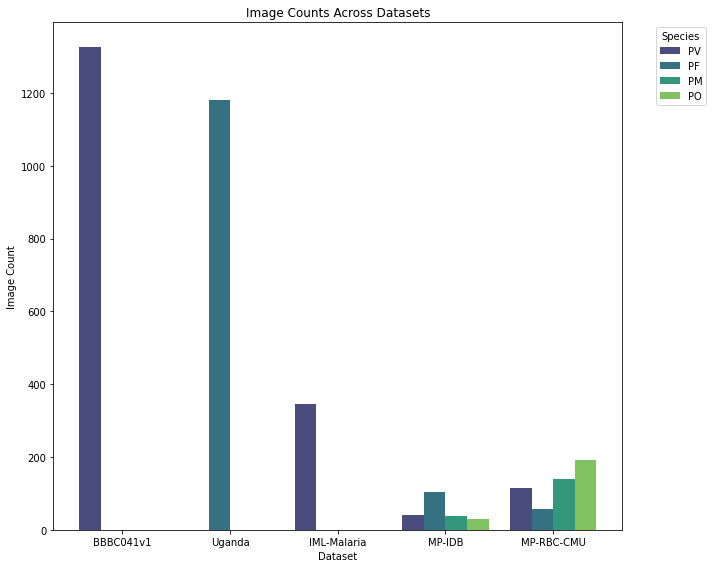

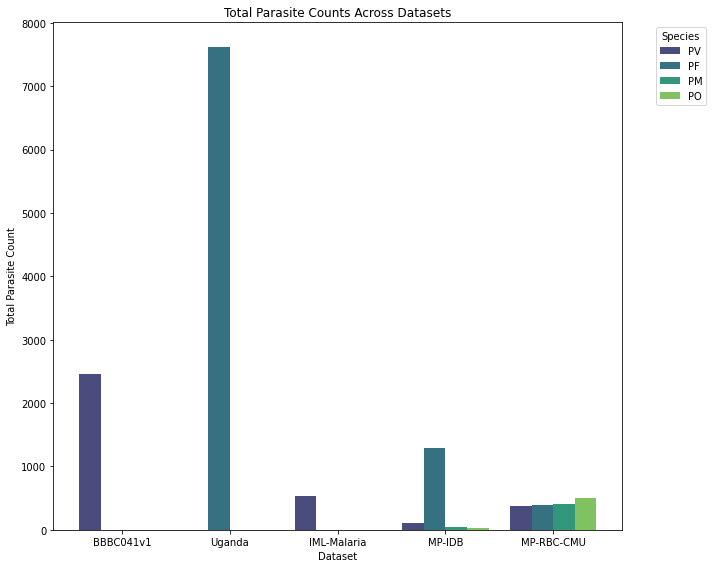

In [28]:
datasets = ['BBBC041v1', 'Make', 'IML-Malaria']
image_counts = [1328, 1182, 345]
total_parasite_counts = [total_parsite_count, category_counts_UG['plasmodium'], total_iml_parasite]
species = ['PV', 'PF', 'PV']

mp_idb_image_counts = [mp_idb_pf_images, mp_idb_pm_images, mp_idb_po_images, mp_idb_pv_images]
mp_idb_parasite_counts = [mp_idb_pf_count, mp_idb_pm_count, mp_idb_po_count, mp_idb_pv_count]
mp_idb_species = ['PF', 'PM', 'PO', 'PV']

mp_rbc_image_counts = [mp_rbc_pf_images, mp_rbc_pm_images, mp_rbc_po_images, mp_rbc_pv_images]
mp_rbc_parasite_counts = [mp_rbc_pf_count, mp_rbc_pm_count, mp_rbc_po_count, mp_rbc_pv_count]
mp_rbc_species = ['PF', 'PM', 'PO', 'PV']

# Append MP-IDB data to existing data
for i, species_name in enumerate(mp_idb_species):
    datasets.append('MP-IDB')
    image_counts.append(mp_idb_image_counts[i])
    total_parasite_counts.append(mp_idb_parasite_counts[i])
    species.append(species_name)
    
# Append MP-RBC data to existing data
for i, species_name in enumerate(mp_rbc_species):
    datasets.append('MP-RBC-CMU')
    image_counts.append(mp_rbc_image_counts[i])
    total_parasite_counts.append(mp_rbc_parasite_counts[i])
    species.append(species_name)

# Create a DataFrame
data = {
    'Dataset': datasets,
    'Image Count': image_counts,
    'Total Parasite Count': total_parasite_counts,
    'Species': species
}
df = pd.DataFrame(data)

# Create the first plot for image counts
plt.figure(figsize=(10, 8))
sns.barplot(x='Dataset', y='Image Count', hue='Species', data=df, palette='viridis')
plt.title('Image Counts Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Image Count')
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('image_counts_across_datasets.png', bbox_inches='tight')
plt.plot()

# Create the second plot for total parasite counts
plt.figure(figsize=(10, 8))
sns.barplot(x='Dataset', y='Total Parasite Count', hue='Species', data=df, palette='viridis')
plt.title('Total Parasite Counts Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Total Parasite Count')
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('total_parasite_counts_across_datasets.png', bbox_inches='tight')
plt.plot()


In [29]:

# Display the DataFrame as tables
print("Image Counts and Total Parasite Counts Across Datasets:")
print(df[['Dataset', 'Species', 'Image Count', 'Total Parasite Count']].sort_values(by=['Dataset', 'Species']))

# Optionally, you can save the DataFrame to a CSV file
df[['Dataset', 'Species', 'Image Count', 'Total Parasite Count']].to_csv('dataset_summary.csv', index=False)


Image Counts and Total Parasite Counts Across Datasets:
        Dataset Species  Image Count  Total Parasite Count
0     BBBC041v1      PV         1328                2452.0
2   IML-Malaria      PV          345                 529.0
3        MP-IDB      PF          104                1297.0
4        MP-IDB      PM           37                  43.0
5        MP-IDB      PO           29                  34.0
6        MP-IDB      PV           40                 106.0
7    MP-RBC-CMU      PF           58                 398.0
8    MP-RBC-CMU      PM          139                 406.0
9    MP-RBC-CMU      PO          191                 502.0
10   MP-RBC-CMU      PV          114                 378.0
1        Uganda      PF         1182                7628.0
